# Time Series Analysis

In this notebook i'm starting to analyse the **Rapporti_di_lavoro_attivati.csv** dataset as a time series dataset.
In particular i want to see some trends related to the years of COVID19 pandemic and then i'd want to try to do some predictions of amount of new employers requested in the future. 

# Time series analysis

In this part i will try to find out some patters, autocorrelations and seasonalities

Firstly let's set the data column as index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

STD_SIZE = (15, 10)

/home/ale/anaconda3/envs/datasciencefb/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
timed_labours = pd.read_csv('./activated_labours_cleaned.csv', parse_dates=['DATA'])

In [3]:
timed_labours.set_index('DATA', inplace=True)
timed_labours.drop('Unnamed: 0', axis=1, inplace=True)
timed_labours.head()

,GENERE,ETA,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,NAZIONALITA
DATA,,,,,,,
1973-02-01,F,20,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA
1974-11-06,F,21,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,MILANO,ITALIA
1976-01-10,F,21,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PARZIALE ORIZZONTALE,BERGAMO,ITALIA
1978-01-05,M,25,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA
1978-10-07,M,26,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA


Then count the number of records belonging to each month in all the years in the dataset.

In [4]:
num_monthly = timed_labours.groupby(timed_labours.index.month).count().iloc[:, [0]]
num_monthly.rename(columns={'GENERE': 'COUNT'}, inplace=True)
num_monthly.index.rename('MONTH', inplace=True)
num_monthly

,COUNT
MONTH,
1,758272
2,774982
3,727018
4,716190
5,716028
6,781225
7,805486
8,684845
9,1149358


<AxesSubplot:title={'center':'Monthly total number of activated labours'}, xlabel='Month', ylabel='Number of activated labours'>

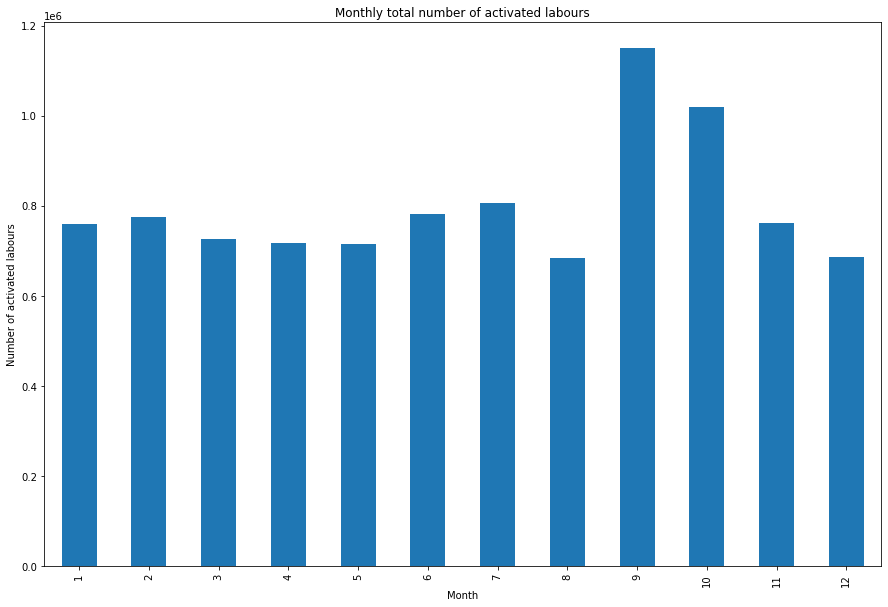

In [5]:
num_monthly.plot(title='Monthly total number of activated labours', 
                 xlabel='Month', 
                 ylabel='Number of activated labours', 
                 kind='bar', 
                 legend=False, 
                 figsize=STD_SIZE)

<AxesSubplot:title={'center':'Monthly total number of activated labours'}, xlabel='Month', ylabel='Number of activated labours'>

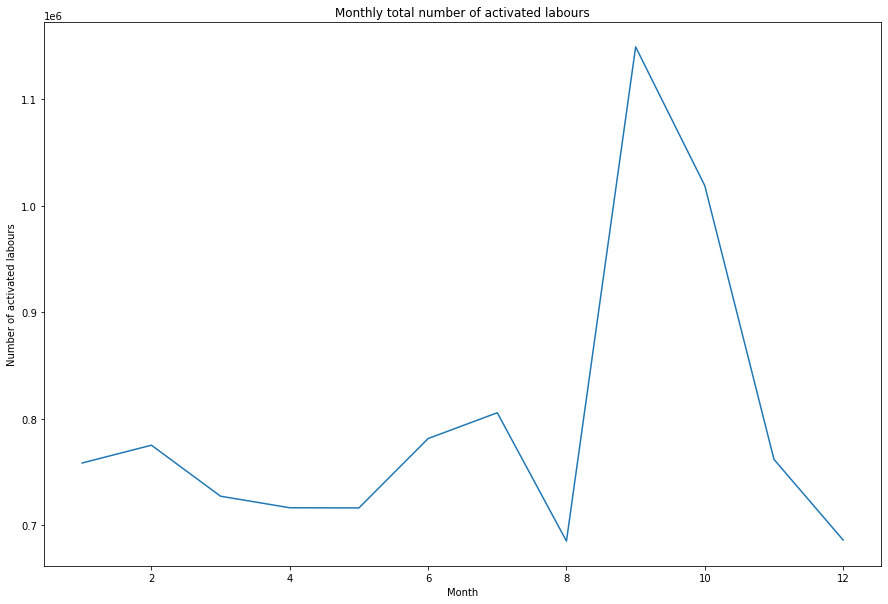

In [6]:
num_monthly.plot(title='Monthly total number of activated labours', 
                 xlabel='Month', 
                 ylabel='Number of activated labours',  
                 legend=False, 
                 figsize=STD_SIZE)

It seems that August and December, probably due to vacations, are the months during which there are less activations of labours, while the higher number of activations are achieved during September and October.

In [7]:
timed_labours2 = timed_labours[['GENERE']]

In [8]:
timed_labours2 = timed_labours2.resample('M').count()
timed_labours2.rename(columns={'GENERE': 'COUNT'}, inplace=True)

In [9]:
# filter data that are too low
timed_labours2 = timed_labours2[timed_labours2.COUNT > 5000]

<AxesSubplot:xlabel='DATA'>

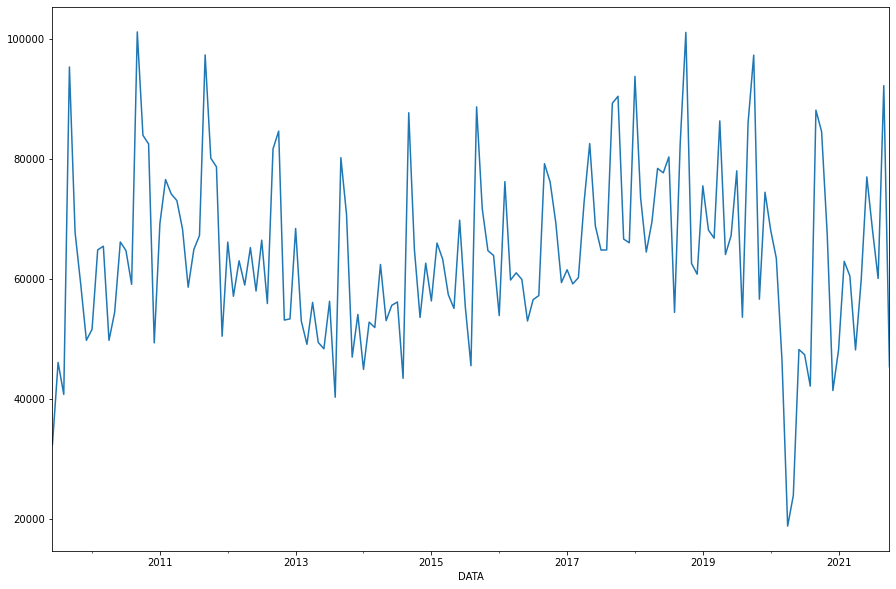

In [10]:
timed_labours2.plot(figsize=STD_SIZE, legend=False)

In [34]:
timed_labours2.tail()

,COUNT
DATA,
2021-06-30,76999
2021-07-31,68171
2021-08-31,60090
2021-09-30,92194
2021-10-31,45378


/home/ale/anaconda3/envs/datasciencefb/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


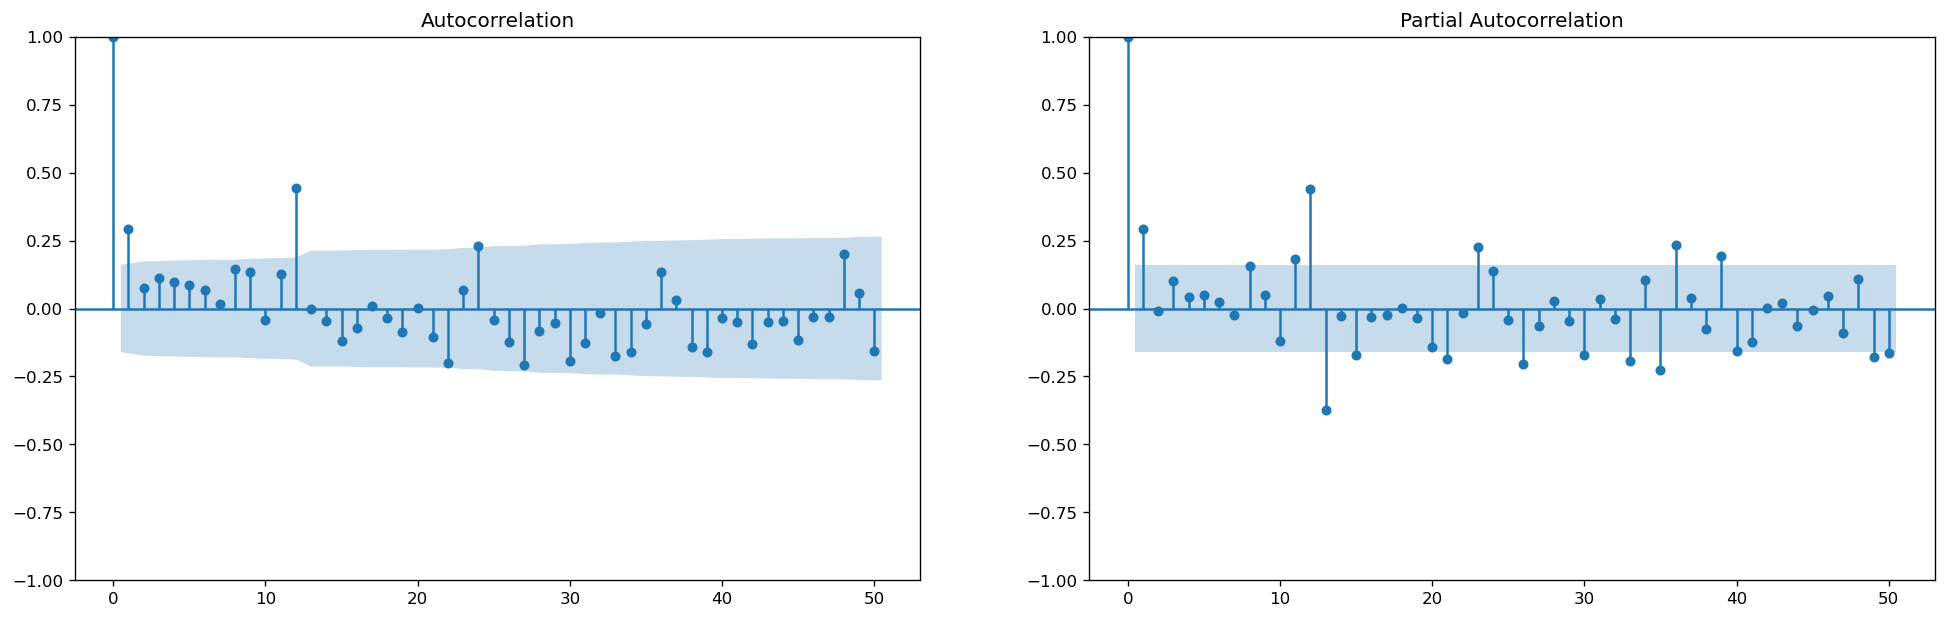

In [22]:
fig, axes = plt.subplots(1,2,figsize=(20,6), dpi= 120)
plot_acf(timed_labours2.COUNT.tolist(), lags=50, ax=axes[0])
plot_pacf(timed_labours2.COUNT.tolist(), lags=50, ax=axes[1])
plt.show()

Autocorrelation shows if there are correlations between current data and the same data in the past. The trend of the above plot shows that there is a lack of autocorrelation between months of the same year. This means that number of activated labours aren't likely to have the same trend during the months of every year.

Do the same but yearly...

In [39]:
num_yearly = timed_labours.groupby(timed_labours.index.year).count().iloc[:, [0]]
num_yearly.rename(columns={'GENERE': 'COUNT'}, inplace=True)
num_yearly.index.rename('YEAR', inplace=True)
num_yearly

,COUNT
YEAR,
1973,1
1974,1
1976,1
1978,2
1979,1
1980,1
1981,1
1982,1
1988,1


Years until **2008** do not contain enough activations of labours.

In [40]:
num_yearly = num_yearly[num_yearly.index > 2008]
num_yearly

,COUNT
YEAR,
2009,397507
2010,793129
2011,858716
2012,763733
2013,673152
2014,689300
2015,757895
2016,761881
2017,847079


<AxesSubplot:title={'center':'Yearly total number of activated labours'}, xlabel='years', ylabel='counts'>

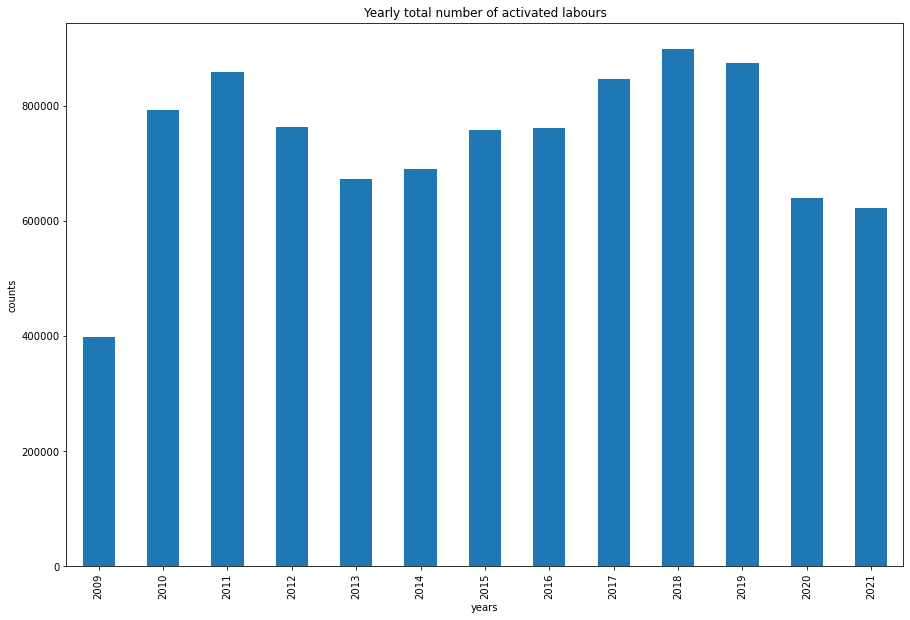

In [41]:
num_yearly.plot(title='Yearly total number of activated labours',
                xlabel='years',
                ylabel='counts',
                kind='bar',
                legend=False,
                figsize=STD_SIZE)

/home/ale/anaconda3/envs/datasciencefb/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


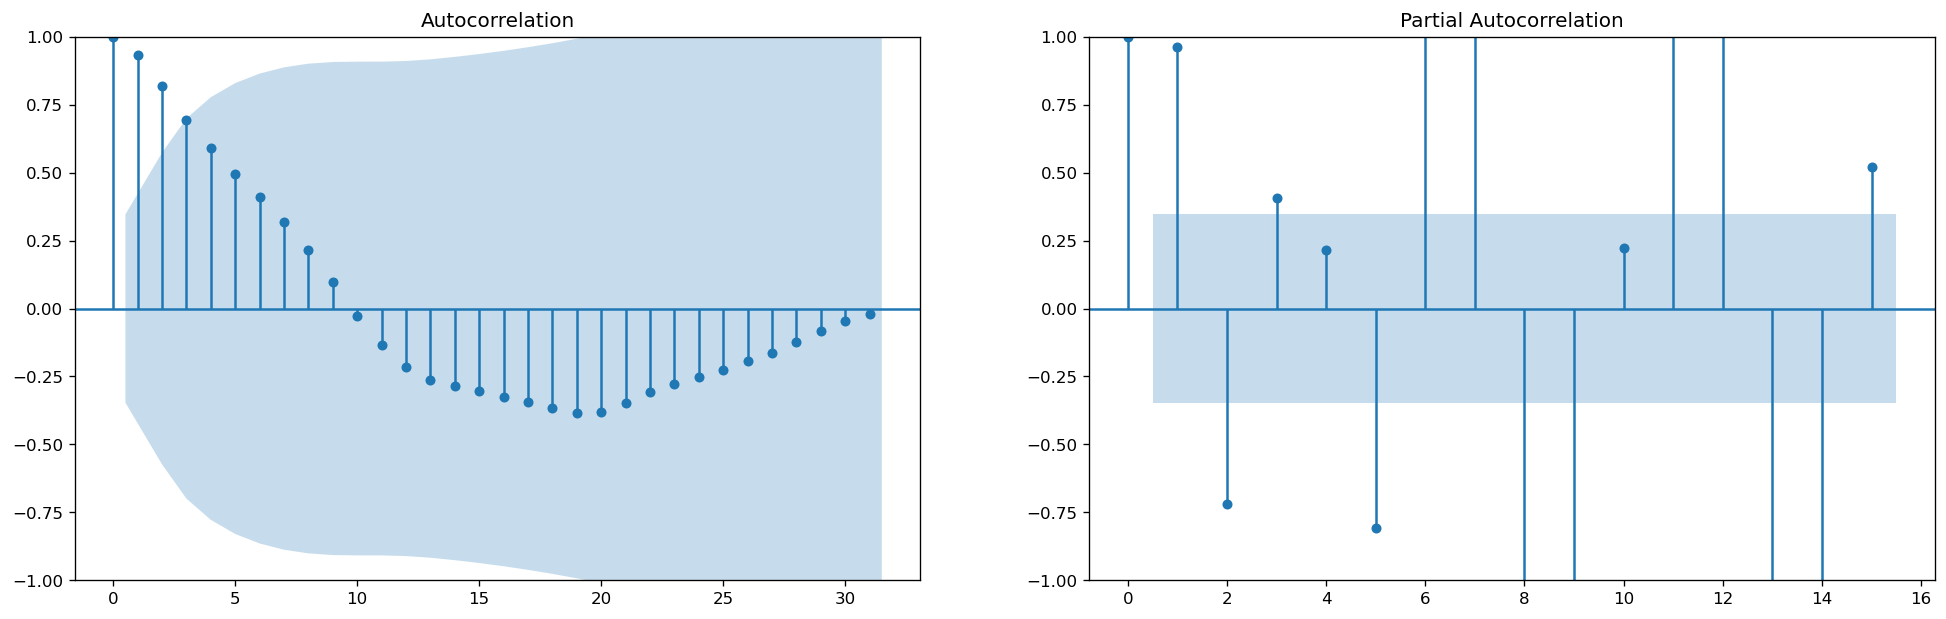

In [54]:
# plt.rc('figure', figsize=STD_SIZE)
# plot_acf(timed_labours.groupby(timed_labours.index.month).count().iloc[:,[0]])
# plt.xlabel('Day of month')
# plt.show()

fig, axes = plt.subplots(1,2,figsize=(20,6), dpi= 120)
plot_acf(timed_labours.groupby(timed_labours.index.year).count().iloc[:,[0]], lags=31, ax=axes[0])
plot_pacf(timed_labours.groupby(timed_labours.index.year).count().iloc[:,[0]], lags=15, ax=axes[1])
plt.show()

In [43]:
timed_labours3 = timed_labours[['GENERE']]

In [44]:
timed_labours3 = timed_labours3.resample('Y').count()
timed_labours3.rename(columns={'GENERE': 'COUNT'}, inplace=True)

In [45]:
# filter data that are too low
timed_labours3 = timed_labours3[timed_labours3.COUNT > 5000]

<AxesSubplot:xlabel='DATA'>

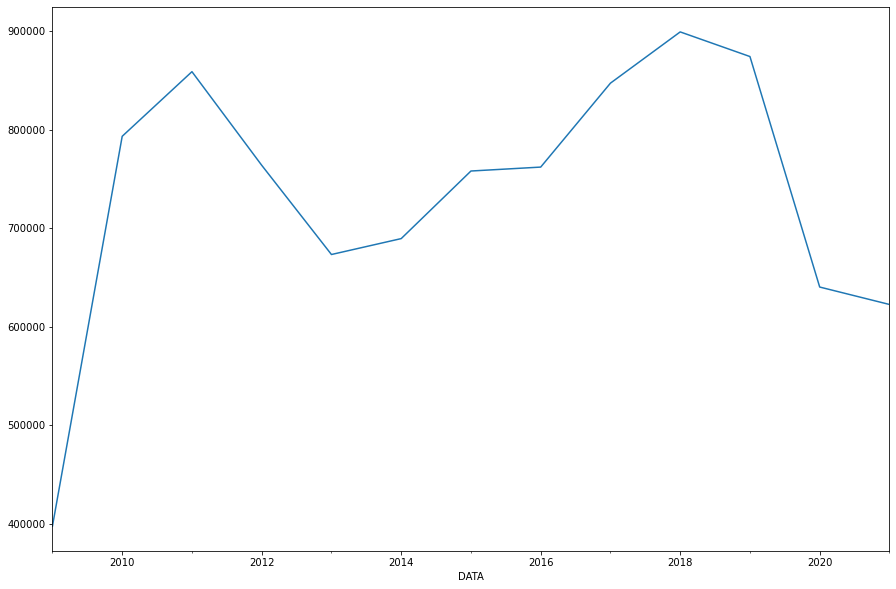

In [46]:
timed_labours3.plot(figsize=STD_SIZE, legend=False)

/home/ale/anaconda3/envs/datasciencefb/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


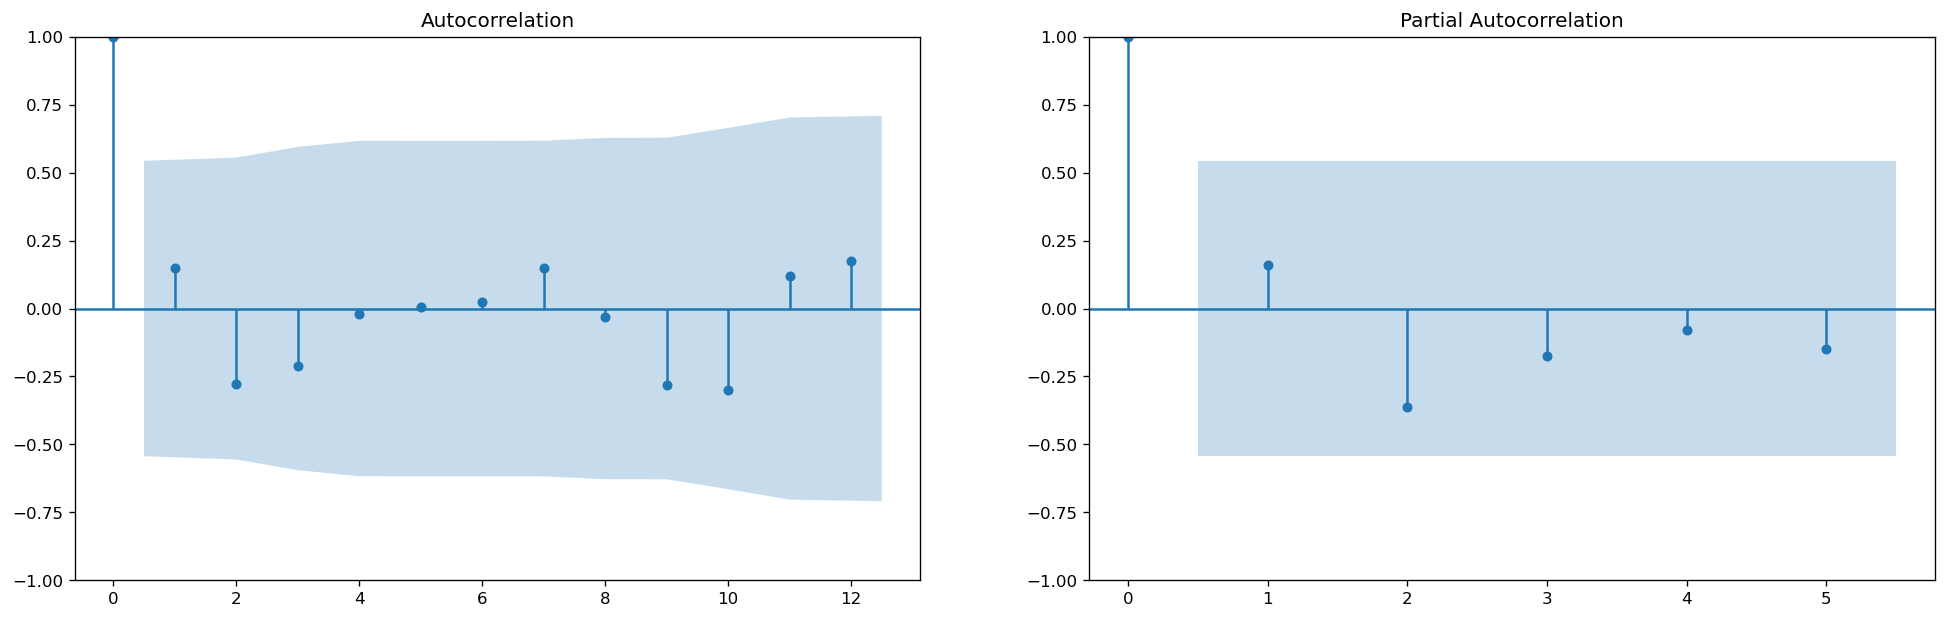

In [50]:
fig, axes = plt.subplots(1,2,figsize=(20,6), dpi= 120)
plot_acf(timed_labours3.COUNT.tolist(), lags=12, ax=axes[0])
plot_pacf(timed_labours3.COUNT.tolist(), lags=5, ax=axes[1])
plt.show()

### Let's inspect a bit more the crisis between 2019 and 2020

In [42]:
year_2019 = timed_labours[timed_labours.index.year == 2019].iloc[:, [0]]
year_2020 = timed_labours[timed_labours.index.year == 2020].iloc[:, [0]]
year_2019 = year_2019.groupby(year_2019.index.month).count()
year_2020 = year_2020.groupby(year_2020.index.month).count()
year_2019.rename(columns={'GENERE': 'COUNT'}, inplace=True)
year_2020.rename(columns={'GENERE': 'COUNT'}, inplace=True)
year_2019.index.rename('MONTH', inplace=True)
year_2020.index.rename('MONTH', inplace=True)
year_2019

,COUNT
MONTH,
1,75513
2,68142
3,66795
4,86322
5,64083
6,67219
7,78007
8,53635
9,85985


In [43]:
year_2020

,COUNT
MONTH,
1,68135
2,63421
3,46435
4,18862
5,23954
6,48257
7,47405
8,42171
9,88113


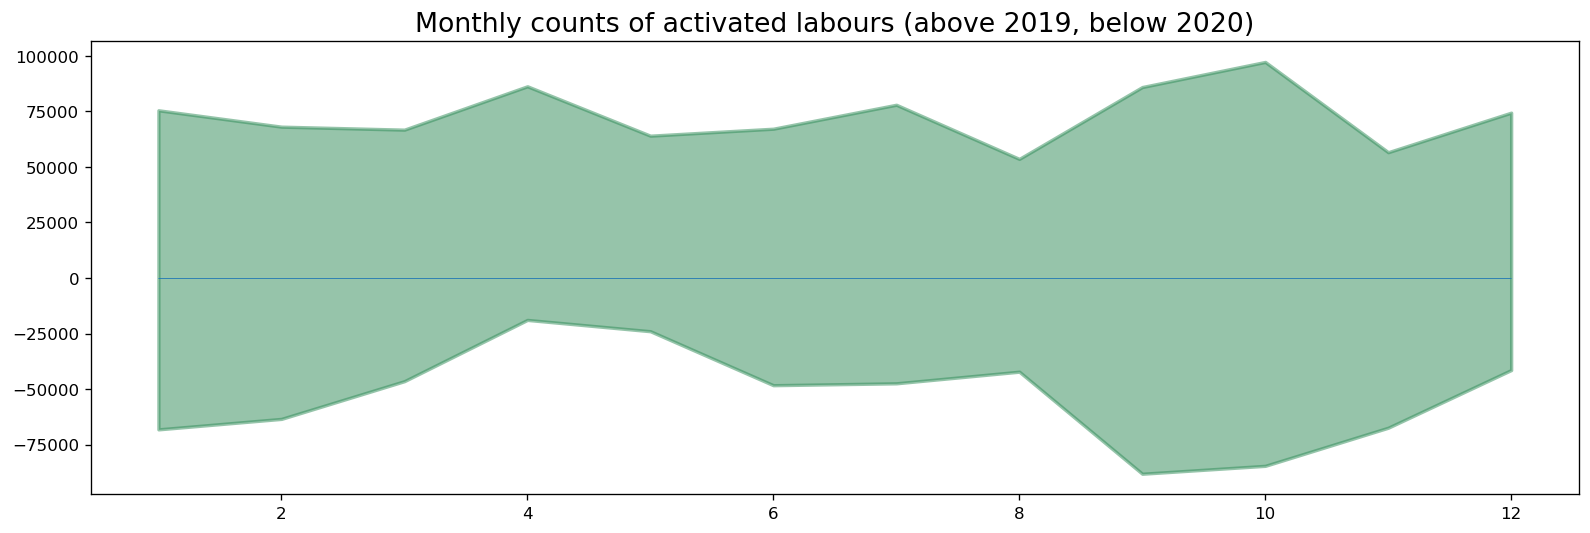

In [44]:
months = year_2019.index.values
counts_2019 = year_2019.values.reshape(1, -1)[0]
counts_2020 = year_2020.values.reshape(1, -1)[0]

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(months, y1=counts_2019, y2=-counts_2020, alpha=0.5, linewidth=2, color='seagreen')
#plt.ylim(-800, 800)
plt.title('Monthly counts of activated labours (above 2019, below 2020)', fontsize=16)
plt.hlines(y=0, xmin=1, xmax=12, linewidth=.5)
plt.show()

A drastic reduction of activations during April, May, coincidently with the first lockdown during covid19 first year pandemic.
Below the mean also during summer and another reduction at the beginning of winter.
A great increase during autumn when a lot of new teachers where needed.

...

In [48]:
num_monthly2 = timed_labours.groupby([timed_labours.index.month, 'CONTRATTO']).count().iloc[:,[0]]
num_monthly2 = num_monthly2.unstack('CONTRATTO')
num_monthly2

GENERE  \
CONTRATTO APPRENDISTATO DI ALTA FORMAZIONE E RICERCA   
DATA                                                   
1                                               83.0   
2                                               72.0   
3                                               43.0   
4                                               51.0   
5                                               56.0   
6                                               55.0   
7                                               27.0   
8                                               31.0   
9                                               72.0   
10                                              72.0   
11                                              40.0   
12                                              68.0   

                                                                                  \
CONTRATTO APPRENDISTATO DI ALTA FORMAZIONE E RICERCA PER LAVORATORI IN MOBILITA¿   
DATA                                                                               
1                                                        NaN                       
2                                                        NaN                       
3                                                        NaN                       
4                                                        NaN                       
5                                                        NaN                       
6                                                        1.0                       
7                                                        NaN                       
8                                                        NaN                       
9                                                        NaN                       
10                                                       NaN                       
11                                                       NaN                       
12                                                       NaN                       

                                             \
CONTRATTO APPRENDISTATO EX ART.16 L. 196/97   
DATA                                          
1                                     455.0   
2                                     700.0   
3                                     634.0   
4                                     577.0   
5                                     473.0   
6                                     976.0   
7                                    1265.0   
8                                     425.0   
9                                    1137.0   
10                                    979.0   
11                                    746.0   
12                                    398.0   

                                                                                         \
CONTRATTO APPRENDISTATO PER L'ACQUISIZIONE DI DIPLOMA O PER PERCORSI DI ALTA FORMAZIONE   
DATA                                                                                      
1                                                       12.0                              
2                                                       15.0                              
3                                                        2.0                              
4                                                        5.0                              
5                                                        1.0                              
6                                                        7.0                              
7                                                        4.0                              
8                                                        4.0                              
9                                                       17.0                              
10                                                       7.0                              
11                                                     